<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter

batch_size = 1024
epochs = 400
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 1024      
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 8)                 0

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 3s 11ms/step - loss: 12252.1240 - val_loss: 12186.0439
Epoch 2/400
165/165 [==============================] - 1s 9ms/step - loss: 11854.1523 - val_loss: 11197.2061
Epoch 3/400
165/165 [==============================] - 1s 7ms/step - loss: 11330.2109 - val_loss: 10374.9121
Epoch 4/400
165/165 [==============================] - 1s 7ms/step - loss: 10669.6699 - val_loss: 9576.8164
Epoch 5/400
165/165 [==============================] - 1s 7ms/step - loss: 9883.8994 - val_loss: 8593.2822
Epoch 6/400
165/165 [==============================] - 1s 8ms/step - loss: 8989.4580 - val_loss: 7712.7715
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 8000.4761 - val_loss: 6652.8340
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 6948.7432 - val_loss: 5561.3569
Epoch 9/400
165/165 [==============================] - 1s 4ms/step - loss: 5881.6758 - val_loss: 4341.9551
Epoch 10/400
165/165 [=======

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -3.339985904944486 
MAE:  8.024856646590258 
SD:  9.81014790330722


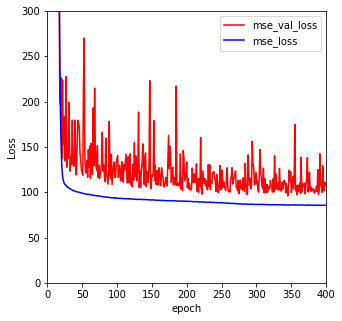

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 1024      
                                                                 
 batch_normalization_2 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 1s 5ms/step - loss: 12451.2803 - val_loss: 12332.2871
Epoch 2/400
165/165 [==============================] - 1s 4ms/step - loss: 12121.6270 - val_loss: 11895.6396
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 11716.9111 - val_loss: 11189.6455
Epoch 4/400
165/165 [==============================] - 1s 4ms/step - loss: 11209.5361 - val_loss: 10496.0469
Epoch 5/400
165/165 [==============================] - 1s 4ms/step - loss: 10605.6260 - val_loss: 9888.2383
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 9927.9482 - val_loss: 9347.2539
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 9201.1514 - val_loss: 8656.1572
Epoch 8/400
165/165 [==============================] - 1s 4ms/step - loss: 8447.4072 - val_loss: 7940.4429
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 7669.7222 - val_loss: 6938.3062
Epoch 10/400
165/165 [======

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.8612087732977046 
MAE:  7.260075238007743 
SD:  9.675257497331652


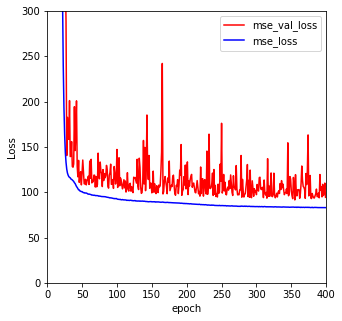

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 1024      
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 12372.0127 - val_loss: 12233.7705
Epoch 2/400
165/165 [==============================] - 1s 5ms/step - loss: 11969.7129 - val_loss: 12024.2061
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 11439.7842 - val_loss: 10729.0371
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 10762.8408 - val_loss: 11157.2900
Epoch 5/400
165/165 [==============================] - 1s 4ms/step - loss: 9950.5459 - val_loss: 10083.4736
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 9047.3506 - val_loss: 9902.1934
Epoch 7/400
165/165 [==============================] - 1s 5ms/step - loss: 8100.0928 - val_loss: 7910.9722
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 7144.3091 - val_loss: 9732.7500
Epoch 9/400
165/165 [==============================] - 1s 4ms/step - loss: 6210.0225 - val_loss: 10028.2588
Epoch 10/400
165/165 [=====

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.1399949100915245 
MAE:  7.534886542381784 
SD:  10.240839004411272


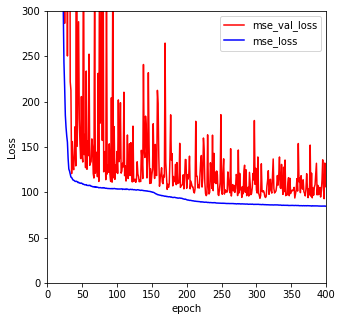

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.44626074051841896 
Ensemble_std:  9.908748135016715


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 1024      
                                                                 
 batch_normalization_6 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 3764.9905 - val_loss: 3608.8088
Epoch 2/400
165/165 [==============================] - 1s 4ms/step - loss: 3569.7507 - val_loss: 3411.5325
Epoch 3/400
165/165 [==============================] - 1s 4ms/step - loss: 3344.0356 - val_loss: 3157.7480
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 3070.2632 - val_loss: 2947.6929
Epoch 5/400
165/165 [==============================] - 1s 4ms/step - loss: 2748.8516 - val_loss: 2623.4919
Epoch 6/400
165/165 [==============================] - 1s 4ms/step - loss: 2407.0603 - val_loss: 2123.9514
Epoch 7/400
165/165 [==============================] - 1s 4ms/step - loss: 2058.8647 - val_loss: 1850.5997
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 1718.7457 - val_loss: 1552.2251
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 1398.1814 - val_loss: 969.1258
Epoch 10/400
165/165 [================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.07748185088144129 
MAE:  4.526589148697009 
SD:  6.06565807348673


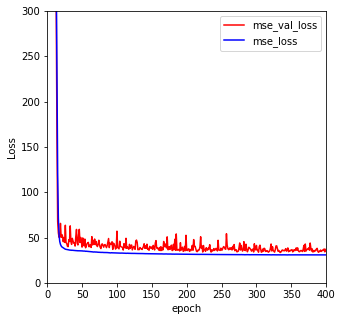

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_8 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_9 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 3691.6143 - val_loss: 3683.9248
Epoch 2/400
165/165 [==============================] - 1s 4ms/step - loss: 3504.0076 - val_loss: 3479.6858
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 3304.8813 - val_loss: 3213.7500
Epoch 4/400
165/165 [==============================] - 1s 4ms/step - loss: 3059.5237 - val_loss: 2932.3572
Epoch 5/400
165/165 [==============================] - 1s 4ms/step - loss: 2753.4187 - val_loss: 2426.9580
Epoch 6/400
165/165 [==============================] - 1s 4ms/step - loss: 2387.5710 - val_loss: 1905.8925
Epoch 7/400
165/165 [==============================] - 1s 4ms/step - loss: 1955.9200 - val_loss: 1517.4434
Epoch 8/400
165/165 [==============================] - 1s 6ms/step - loss: 1506.9242 - val_loss: 1327.5958
Epoch 9/400
165/165 [==============================] - 1s 6ms/step - loss: 1103.0610 - val_loss: 1395.9597
Epoch 10/400
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.5262053799892994 
MAE:  4.425382320633294 
SD:  5.987803647374198


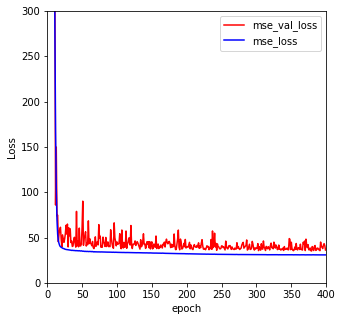

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(8, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 1024      
                                                                 
 batch_normalization_10 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_11 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 8)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
165/165 [==============================] - 2s 6ms/step - loss: 3652.0029 - val_loss: 3672.5361
Epoch 2/400
165/165 [==============================] - 1s 5ms/step - loss: 3433.6799 - val_loss: 3431.1431
Epoch 3/400
165/165 [==============================] - 1s 5ms/step - loss: 3201.9685 - val_loss: 3082.7434
Epoch 4/400
165/165 [==============================] - 1s 5ms/step - loss: 2931.9604 - val_loss: 2768.4304
Epoch 5/400
165/165 [==============================] - 1s 5ms/step - loss: 2629.0208 - val_loss: 2448.3438
Epoch 6/400
165/165 [==============================] - 1s 5ms/step - loss: 2306.1101 - val_loss: 2059.7903
Epoch 7/400
165/165 [==============================] - 1s 4ms/step - loss: 1975.6962 - val_loss: 1665.4358
Epoch 8/400
165/165 [==============================] - 1s 5ms/step - loss: 1618.9585 - val_loss: 1374.6226
Epoch 9/400
165/165 [==============================] - 1s 5ms/step - loss: 1282.5912 - val_loss: 1099.1946
Epoch 10/400
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  2.870981182856782 
MAE:  4.994783837103851 
SD:  6.013599785351958


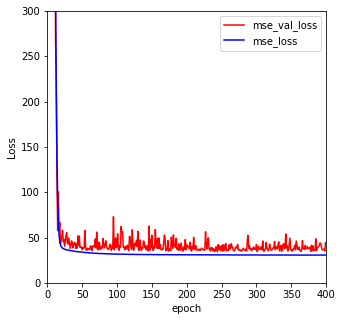

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  0.7557646506620138 
Ensemble_std:  6.022353835404295
